Det kan være fordelaktig å definere koder som gjentas ofte via en funksjon. Aksetitler er et godt eksempel. God stil vil være å importere modulen <axes> fra <mypackage>. Da vil axsetitler bli konsekvent gjennom en avhandling, og enkelt å endre. Det redda meg, da jeg hadde stavefeil(!) i en akse i hundrevis av grafer. Tok et par minutter å fikse. 

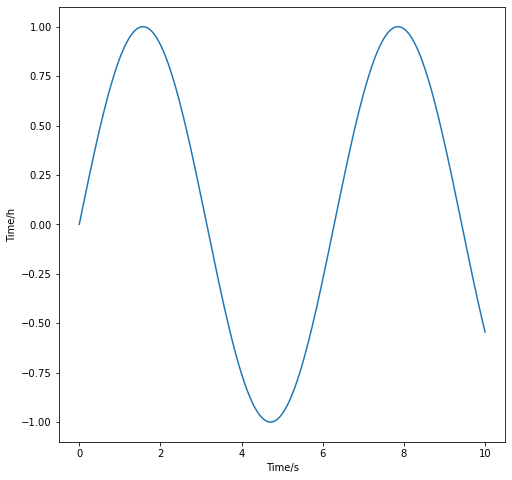

In [8]:
"""
Pretend the function time was imported from mypackage.axes and should be called as axes.time()
"""
####################################
import numpy as np
import matplotlib.pyplot as plt
####################################
def time(unit=None):
    if unit is None:
        unit='hour'
    unit=unit.lower()
    units = {
        'hour':'h',
        'h':'h',
        'second':'s',
        'seconds':'s',
        's':'s'}
    return f'Time/{units[unit]}'

fig,ax=plt.subplots(figsize=(8,8))
ax.set_ylabel(time('hour'))
ax.set_xlabel(time('second'))
x=np.linspace(0,10, 1000)
y=np.sin(x)
ax.plot(x,y)


    